In [1]:
import pandas as pd
import numpy as np

import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)

In [59]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

# Attribute Information:


   1. **name**	Name of the country concerned
   2. **landmass**	1=N.America, 2=S.America, 3=Europe, 4=Africa, 5=Asia, 6=Oceania
   3. **zone**	Geographic quadrant, based on Greenwich and the Equator
                1=NE, 2=SE, 3=SW, 4=NW
   4. **area**	in thousands of square km
   5. **population**	in round millions
   6. **language** 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other 
               Indo-European, 7=Chinese, 8=Arabic, 
               9=Japanese/Turkish/Finnish/Magyar, 10=Others
   7. **religion** 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu,
               5=Ethnic, 6=Marxist, 7=Others
   8. **bars**     Number of vertical bars in the flag
   9. **stripes**  Number of horizontal stripes in the flag
  10. **colours**  Number of different colours in the flag
  11. **red**      0 if red absent, 1 if red present in the flag
  12. **green**    same for green
  13. **blue**     same for blue
  14. **gold**     same for gold (also yellow)
  15. **white**    same for white
  16. **black**    same for black
  17. **orange**   same for orange (also brown)
  18. **mainhue**  predominant colour in the flag (tie-breaks decided by taking
               the topmost hue, if that fails then the most central hue,
               and if that fails the leftmost hue)
  19. **circles**  Number of circles in the flag
  20. **crosses**  Number of (upright) crosses
  21. **saltires** Number of diagonal crosses
  22. **quarters** Number of quartered sections
  23. **sunstars** Number of sun or star symbols
  24. **crescent** 1 if a crescent moon symbol present, else 0
  25. **triangle** 1 if any triangles present, 0 otherwise
  26. **icon**     1 if an inanimate image present (e.g., a boat), otherwise 0
  27. **animate**  1 if an animate image (e.g., an eagle, a tree, a human hand)
               present, 0 otherwise
  28. **text**     1 if any letters or writing on the flag (e.g., a motto or
               slogan), 0 otherwise
  29. **topleft**  colour in the top-left corner (moving right to decide 
               tie-breaks)
  30. **botright** Colour in the bottom-left corner (moving left to decide 
               tie-breaks)

In [83]:
names = ['name', 
         'landmass', 
         'zone', 
         'area', 
         'population', 
         'language', 
         'religion', 
         'bars', 
         'stripes', 
         'colours', 
         'red', 
         'green', 
         'blue', 
         'gold', 
         'white', 
         'black', 
         'orange', 
         'mainhue', 
         'circles', 
         'crosses', 
         'saltires', 
         'quarters', 
         'sunstars', 
         'crescent', 
         'triangle', 
         'icon', 
         'animate', 
         'text', 
         'topleft', 
         'botright']

In [84]:
data = pd.read_csv('flags/flag.data', names=names)

In [85]:
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        194 non-null    object
 1   landmass    194 non-null    int64 
 2   zone        194 non-null    int64 
 3   area        194 non-null    int64 
 4   population  194 non-null    int64 
 5   language    194 non-null    int64 
 6   religion    194 non-null    int64 
 7   bars        194 non-null    int64 
 8   stripes     194 non-null    int64 
 9   colours     194 non-null    int64 
 10  red         194 non-null    int64 
 11  green       194 non-null    int64 
 12  blue        194 non-null    int64 
 13  gold        194 non-null    int64 
 14  white       194 non-null    int64 
 15  black       194 non-null    int64 
 16  orange      194 non-null    int64 
 17  mainhue     194 non-null    object
 18  circles     194 non-null    int64 
 19  crosses     194 non-null    int64 
 20  saltires  

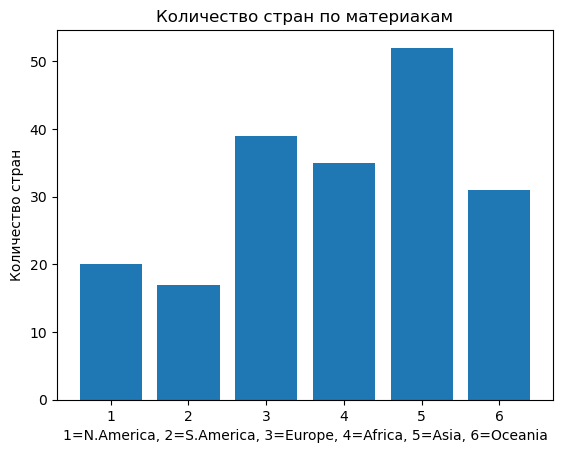

In [58]:
plt.bar(data.landmass.unique(), data.landmass.value_counts())
plt.title('Количество стран по материакам')
plt.xlabel('1=N.America, 2=S.America, 3=Europe, 4=Africa, 5=Asia, 6=Oceania')
plt.ylabel('Количество стран')
plt.show()

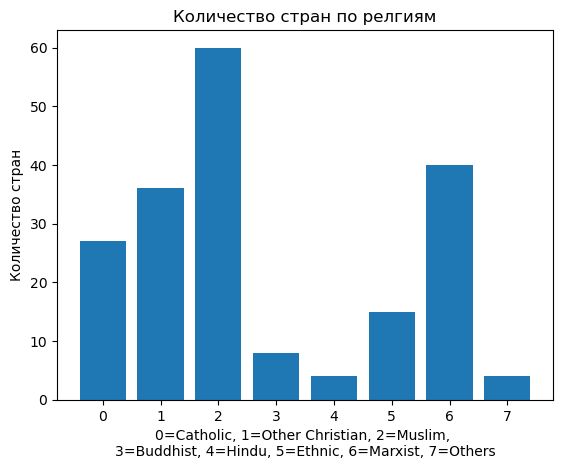

In [57]:
plt.bar(data.religion.unique(), data.religion.value_counts())
plt.title('Количество стран по релгиям')
plt.xlabel("""0=Catholic, 1=Other Christian, 2=Muslim, 
3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others""")
plt.ylabel('Количество стран')
plt.show()

## RandomForest со всеми названиями стран

In [ ]:
X = data.copy()
X = pd.get_dummies(X, columns=['name', 'mainhue', 'topleft', 'botright'])

In [ ]:
y = X.religion
del X['religion']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [54]:
model = RandomForestClassifier()

In [55]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
model.score(X_test, y_test)

0.6410256410256411

In [61]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       0.81      0.81      0.81        16
           2       0.43      0.75      0.55         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.67      0.67      0.67         6
           6       1.00      0.20      0.33         5

    accuracy                           0.64        39
   macro avg       0.49      0.46      0.42        39
weighted avg       0.67      0.64      0.61        39



In [72]:
dc = data.corr()

<Axes: >

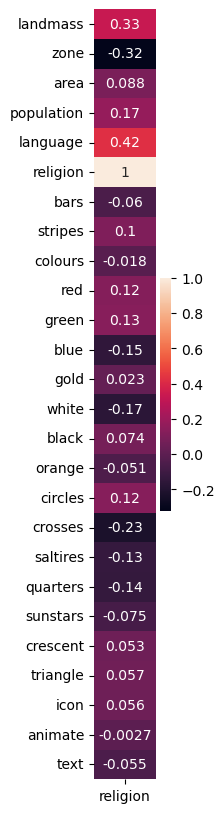

In [81]:
plt.figure(figsize=(1, 10))
sns.heatmap(pd.DataFrame(dc.religion), annot=True)

In [113]:
cols = ['landmass', 'zone', 'language', 'crosses', 'population', 'white']

In [115]:
data_cols = data[cols]

In [116]:
data_cols

,landmass,zone,language,crosses,population,white
0,5,1,10,0,16,1
1,3,1,6,0,3,0
2,4,1,8,0,20,1
3,6,3,1,0,0,1
4,3,1,6,0,0,0
...,...,...,...,...,...,...
189,6,3,1,0,0,1
190,3,1,6,0,22,1
191,4,2,10,0,28,0
192,4,2,10,0,6,0


In [121]:
X_train_dc, X_test_dc, y_train, y_test = train_test_split(data_cols, y, test_size=.2, random_state=42) 

In [122]:
model.fit(X_train_dc, y_train)

RandomForestClassifier()

In [123]:
model.score(X_test_dc, y_test)

0.717948717948718

In [124]:
print(classification_report(y_test, model.predict(X_test_dc)))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.82      0.88      0.85        16
           2       0.60      0.75      0.67         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.62      0.83      0.71         6
           6       0.67      0.40      0.50         5
           7       0.00      0.00      0.00         0

    accuracy                           0.72        39
   macro avg       0.46      0.46      0.45        39
weighted avg       0.71      0.72      0.70        39

